# **LAB 6**

# *SIFT ALGORITHM*

##### Manasvi Garg 229310259

In [1]:
# Install necessary packages (if not already installed)
!pip install opencv-contrib-python matplotlib

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display image
def show_img(img, title='Image'):
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 3:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


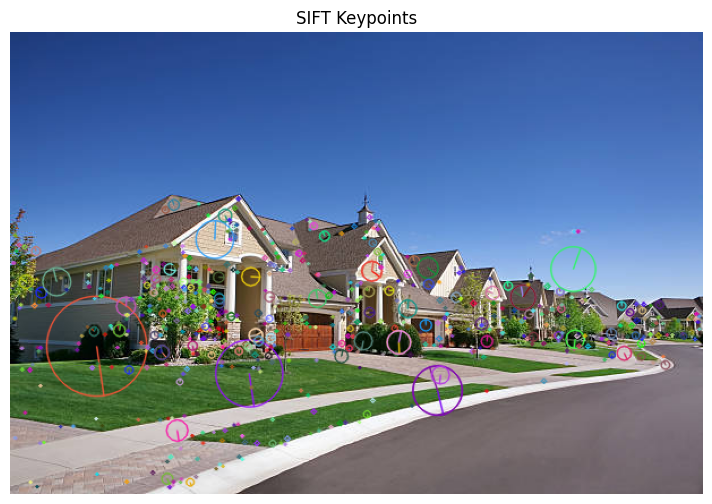

Number of keypoints detected: 653
Descriptor shape: (653, 128)


In [11]:
# Load image
img = cv.imread('image2.jpg')  # Replace with your image path
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv.SIFT_create()

# Detect SIFT features
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
sift_img = cv.drawKeypoints(img, keypoints, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_img(sift_img, "SIFT Keypoints")

# Show descriptor shape
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")


Good matches found: 346


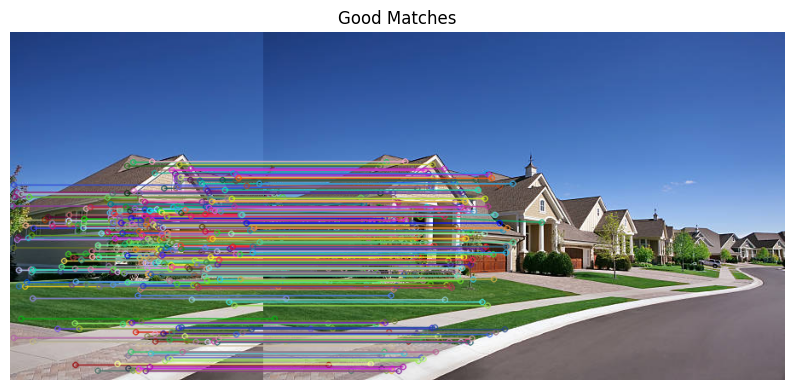

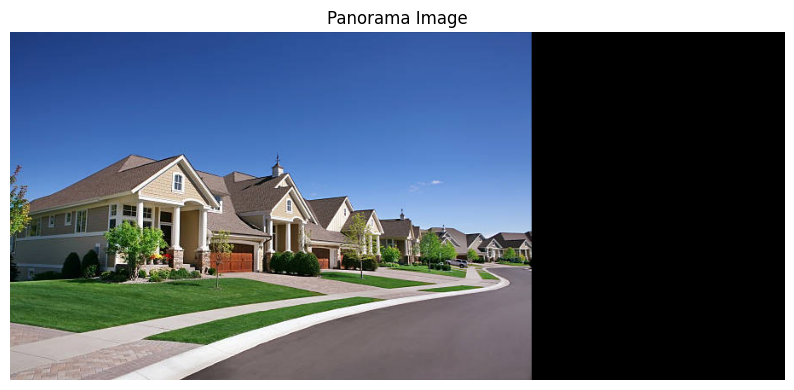

In [10]:
# Load images
img1 = cv.imread('image2Left.jpg')  # left image
img2 = cv.imread('image2.jpg')  # right image

# Convert to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Detect features and compute descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Match features using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Filter matches using Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Good matches found: {len(good_matches)}")

# Draw matches
match_img = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
show_img(match_img, "Good Matches")

# Proceed only if enough matches are found
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography matrix
    H, mask = cv.findHomography(dst_pts, src_pts, cv.RANSAC, 5.0)

    # Warp image 2 to image 1
    result = cv.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))
    result[0:img1.shape[0], 0:img1.shape[1]] = img1

    show_img(result, "Panorama Image")
else:
    print("Not enough matches to compute homography.")
